# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

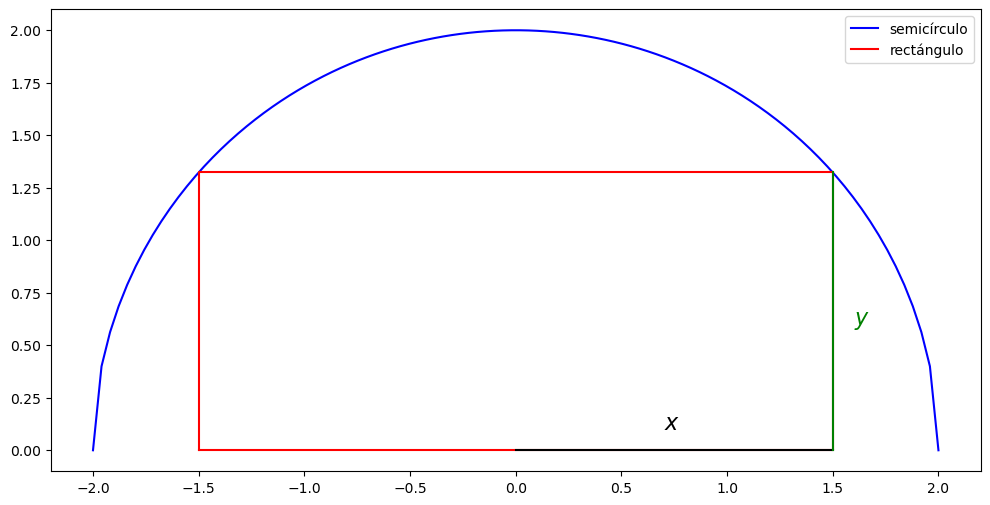

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [10]:
import pandas as pd

In [4]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [3]:
import pandas as pd

In [4]:
datos=pd.read_csv("Salarios_minimos.csv")
datos

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90
5,1991.84,13.33
6,1993.00,14.27
7,1994.00,15.27
8,1995.00,16.34
9,1995.30,18.30


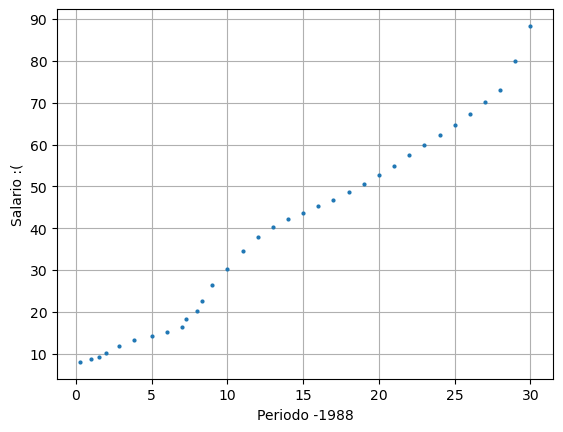

In [7]:
# Restamos 1988 a la columna de 'Periodo'
x=datos['Periodo']-1988
y=datos['Salario']

plt.plot(x,y,'o',ms=2)
plt.xlabel('Periodo -1988')
plt.ylabel('Salario :(')
plt.grid()

**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

In [8]:
def fun(B,x,y):
    n=len(B)-1 # Se necesitan n+1 coeficientes para definir un polinomio de grado 'n'
    X=np.array([x**i for i in range(n+1)]) # Vector de potencias de 'x' [x^0, x^1, x^2, ..., x^n]
    f=np.dot(B,X) # B[0]*x**0+B[1]*x**1+B[2]*x**2+...+B[n]*x**n
    return np.sum((y-f)**2)

In [9]:
import scipy.optimize as opt

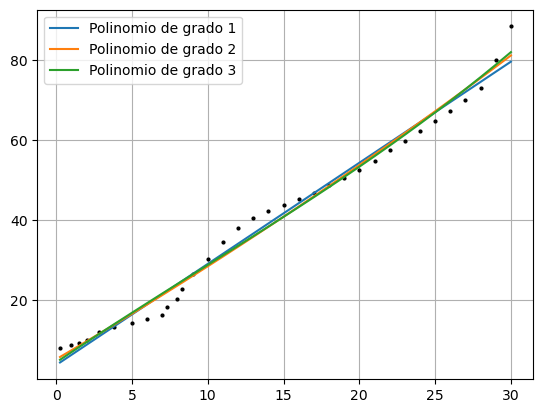

In [11]:
sol=[]

plt.plot(x,y,'ok',ms=2)
for n in range(1,4):
    sol.append(opt.minimize(fun,np.random.rand(n+1),args=(x,y)))
    X=np.array([x**i for i in range(n+1)])
    f=np.dot(sol[-1].x,X)
    plt.plot(x,f,label='Polinomio de grado '+str(n))
plt.legend()
plt.grid()

In [12]:
sol[0] # Solución para el primer polinomio

      fun: 276.8872208693209
 hess_inv: array([[ 0.05133887, -0.00258391],
       [-0.00258391,  0.00018226]])
      jac: array([-3.81469727e-06, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([3.71557796, 2.52832883])

In [13]:
sol[1] # Solución para el segundo polinomio

      fun: 258.5544374960196
 hess_inv: array([[ 1.08572508e-01, -1.48043050e-02,  4.11875200e-04],
       [-1.48043050e-02,  2.79152686e-03, -8.79426355e-05],
       [ 4.11875200e-04, -8.79426355e-05,  2.96401083e-06]])
      jac: array([-7.62939453e-06, -3.81469727e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([5.16416849, 2.21902914, 0.01042461])

In [15]:
sol[2]

      fun: 254.0849893730254
 hess_inv: array([[ 1.77670745e-01, -4.47158287e-02,  2.97596435e-03,
        -5.75019781e-05],
       [-4.47158287e-02,  1.57397485e-02, -1.19789594e-03,
         2.48916893e-05],
       [ 2.97596435e-03, -1.19789594e-03,  9.81119298e-05,
        -2.13377665e-06],
       [-5.75019781e-05,  2.48916893e-05, -2.13377665e-06,
         4.78518380e-08]])
      jac: array([0.00000000e+00, 0.00000000e+00, 1.90734863e-06, 1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([ 4.38105203e+00,  2.55802795e+00, -1.86352042e-02,  6.51692208e-04])

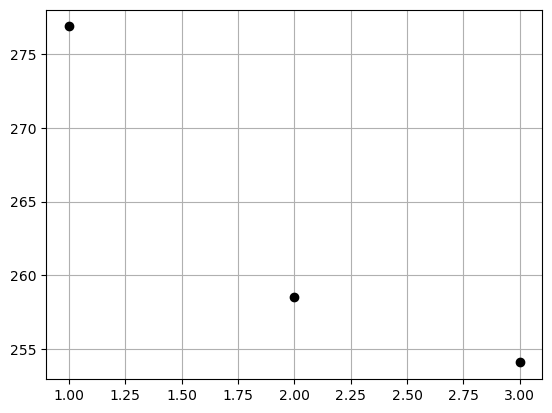

In [14]:
n=1
for solucion in sol:
    plt.plot(n,solucion.fun,'ok')
    n=n+1
plt.grid()

¿Cuál es el polinomio que mejor se ajusta?
* El polinomio de grado 3, porque es el menor error genera
* El polinomio de grado 1, por la relevancia relativa de los coeficientes ;)

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [18]:
# Usamos el polinomio de grado 1
a=2019-1988

n=1
X=np.array([a**i for i in range(n+1)])
f=np.dot(sol[n-1].x,X)
f # Proyección de 'Salario' al 2019

82.09377176750878

* El polinomio de grado 3 estima mejor el dato
* No existe mucha diferencia con respecto al polinomio de grado 1.